In [111]:
#importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [112]:
#carregar arquivo.csv

arquivo_path = 'mcycle_data.csv'
arquivo_result = 'result_mcycle.txt'

#arquivo_path = 'linear_data.csv'
#arquivo_result = 'result_linear.txt'

#arquivo_path = 'autoprice_data.csv' # Hipotese, a coluna 15 depende da coluna 6 e da coluna 7. 
                                    # O grafico de dispersao demonstrou uma tendencia linear positiva
#arquivo_result = 'result_autoprice.txt'


data = pd.read_csv(arquivo_path, header=None)

# Ver dataset
data

,0,1
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


In [113]:
data.describe()

,0,1
count,133.000000,133.000000
mean,25.178947,-25.545865
std,13.132063,48.322050
min,2.400000,-134.000000
25%,15.600000,-54.900000
50%,23.400000,-13.300000
75%,34.800000,0.000000
max,57.600000,75.000000


In [114]:
data.info()

Text(0.5, 1.0, 'Correlação de Pearson')

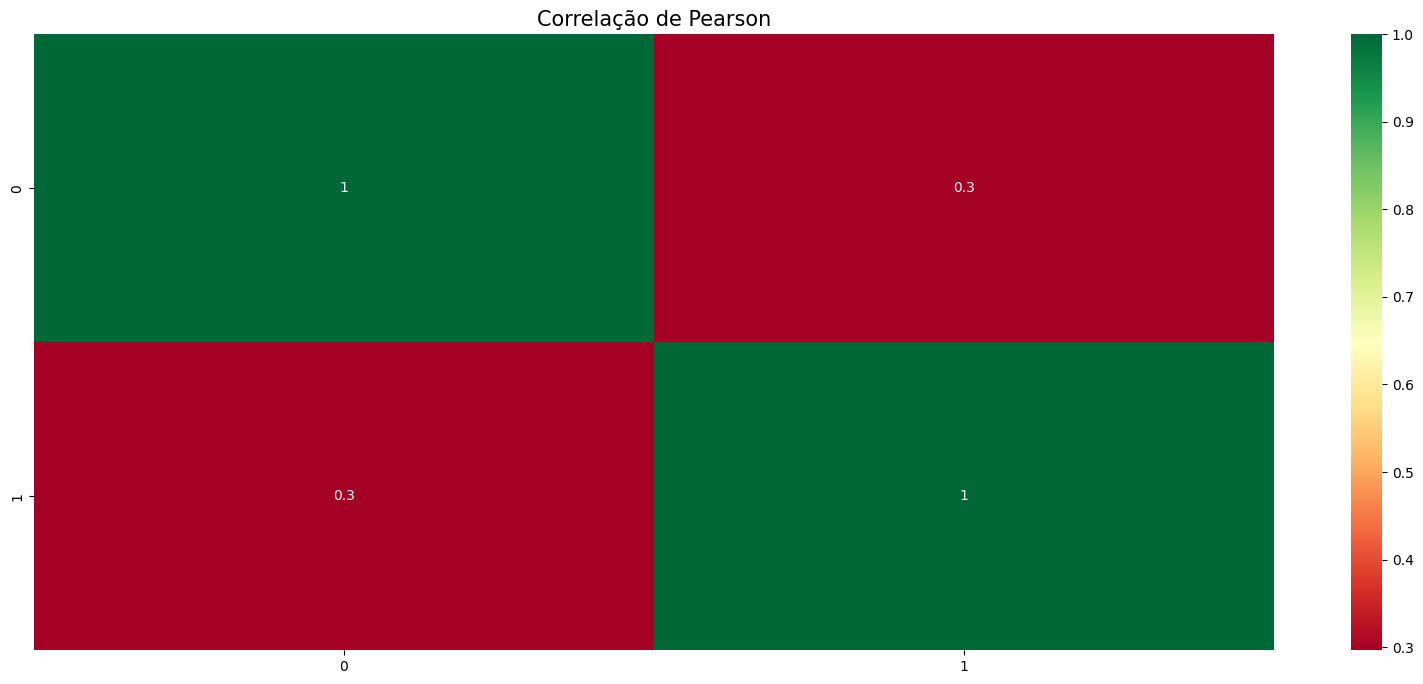

In [115]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot = True, cmap= "RdYlGn")
plt.title('Correlação de Pearson',size=15)

# Coeficiente de Correlação de Pearson (padrão): Mede a relação linear entre duas variáveis contínuas. 

<Axes: xlabel='0', ylabel='1'>

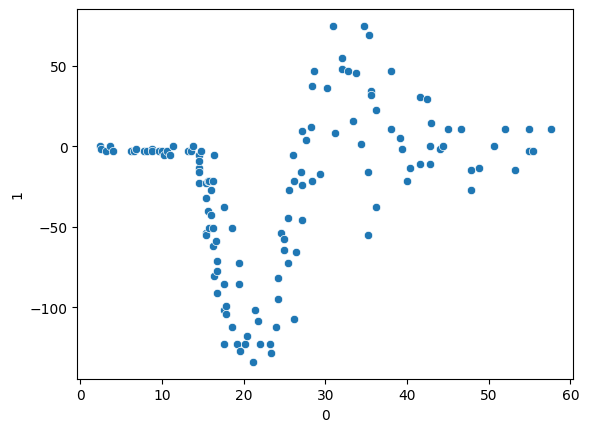

In [116]:
#plotar o grafico de dispersao
sns.scatterplot(data=data, x=data[0], y=data[1])

# Regressao simples

In [117]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional e 
y = data.iloc[:, -1].values

In [118]:
# Separaçao dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
# Criar e treinar um modelo de regressao linear simples
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
# Fazer as prediçoes do modelo
y_pred = model.predict(X_test)


In [121]:
# Imprima as métricas
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

In [122]:
# Abrir o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecionar a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo Regressao simples:")
    print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

# Restauraçao da saída padrão para seu estado original
sys.stdout = sys.__stdout__

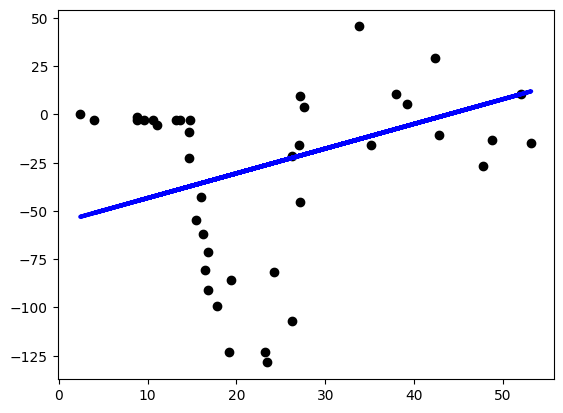

In [123]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

# Regressao multipla

In [124]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional
#X2 = data.iloc[:, ].values.reshape(-1, 1)
#X = np.hstack((X1, X2))
y = data.iloc[:, 1].values

In [125]:
# Separaçao dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# Criar e treinar um modelo de regressao multipla
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
# Fazer as prediçoes do modelo
y_pred = model.predict(X_test)

In [128]:
# Imprima as métricas
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

In [129]:
# Abrir o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecionar a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo Regressao multipla:")
    print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

# Restauraçao da saída padrão para seu estado original
sys.stdout = sys.__stdout__

# SVR

In [130]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # Redimensiona para uma matriz bidimensional
#X2 = data.iloc[:, ].values.reshape(-1, 1)
#X = np.hstack((X1, X2))
y = data.iloc[:, 1].values                 # Coluna de caracteristica dependente

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [133]:
y_pred = model.predict(X_test)

In [134]:
# Imprimir as métricas
print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

In [135]:
# Abrir o arquivo para escrita
with open(arquivo_result, "a", encoding='utf-8') as arquivo:
    # Redirecionar a saída padrão (stdout) para o arquivo
    import sys
    sys.stdout = arquivo
    print("\nModelo SVR com kernel RBF:")
    print('Coeficiente de Determinação (R-squared): %.2f' % r2_score(y_test, y_pred))

# Restauraçao da saída padrão para seu estado original
sys.stdout = sys.__stdout__